# 1. Secret Key Cryptography
---

Secret key cryptography also known as conventional cryptography or symmetric cryptography.

- Very fast. So some use public key cryptography at the begining ( to transmit a temporary shared secret key ). 

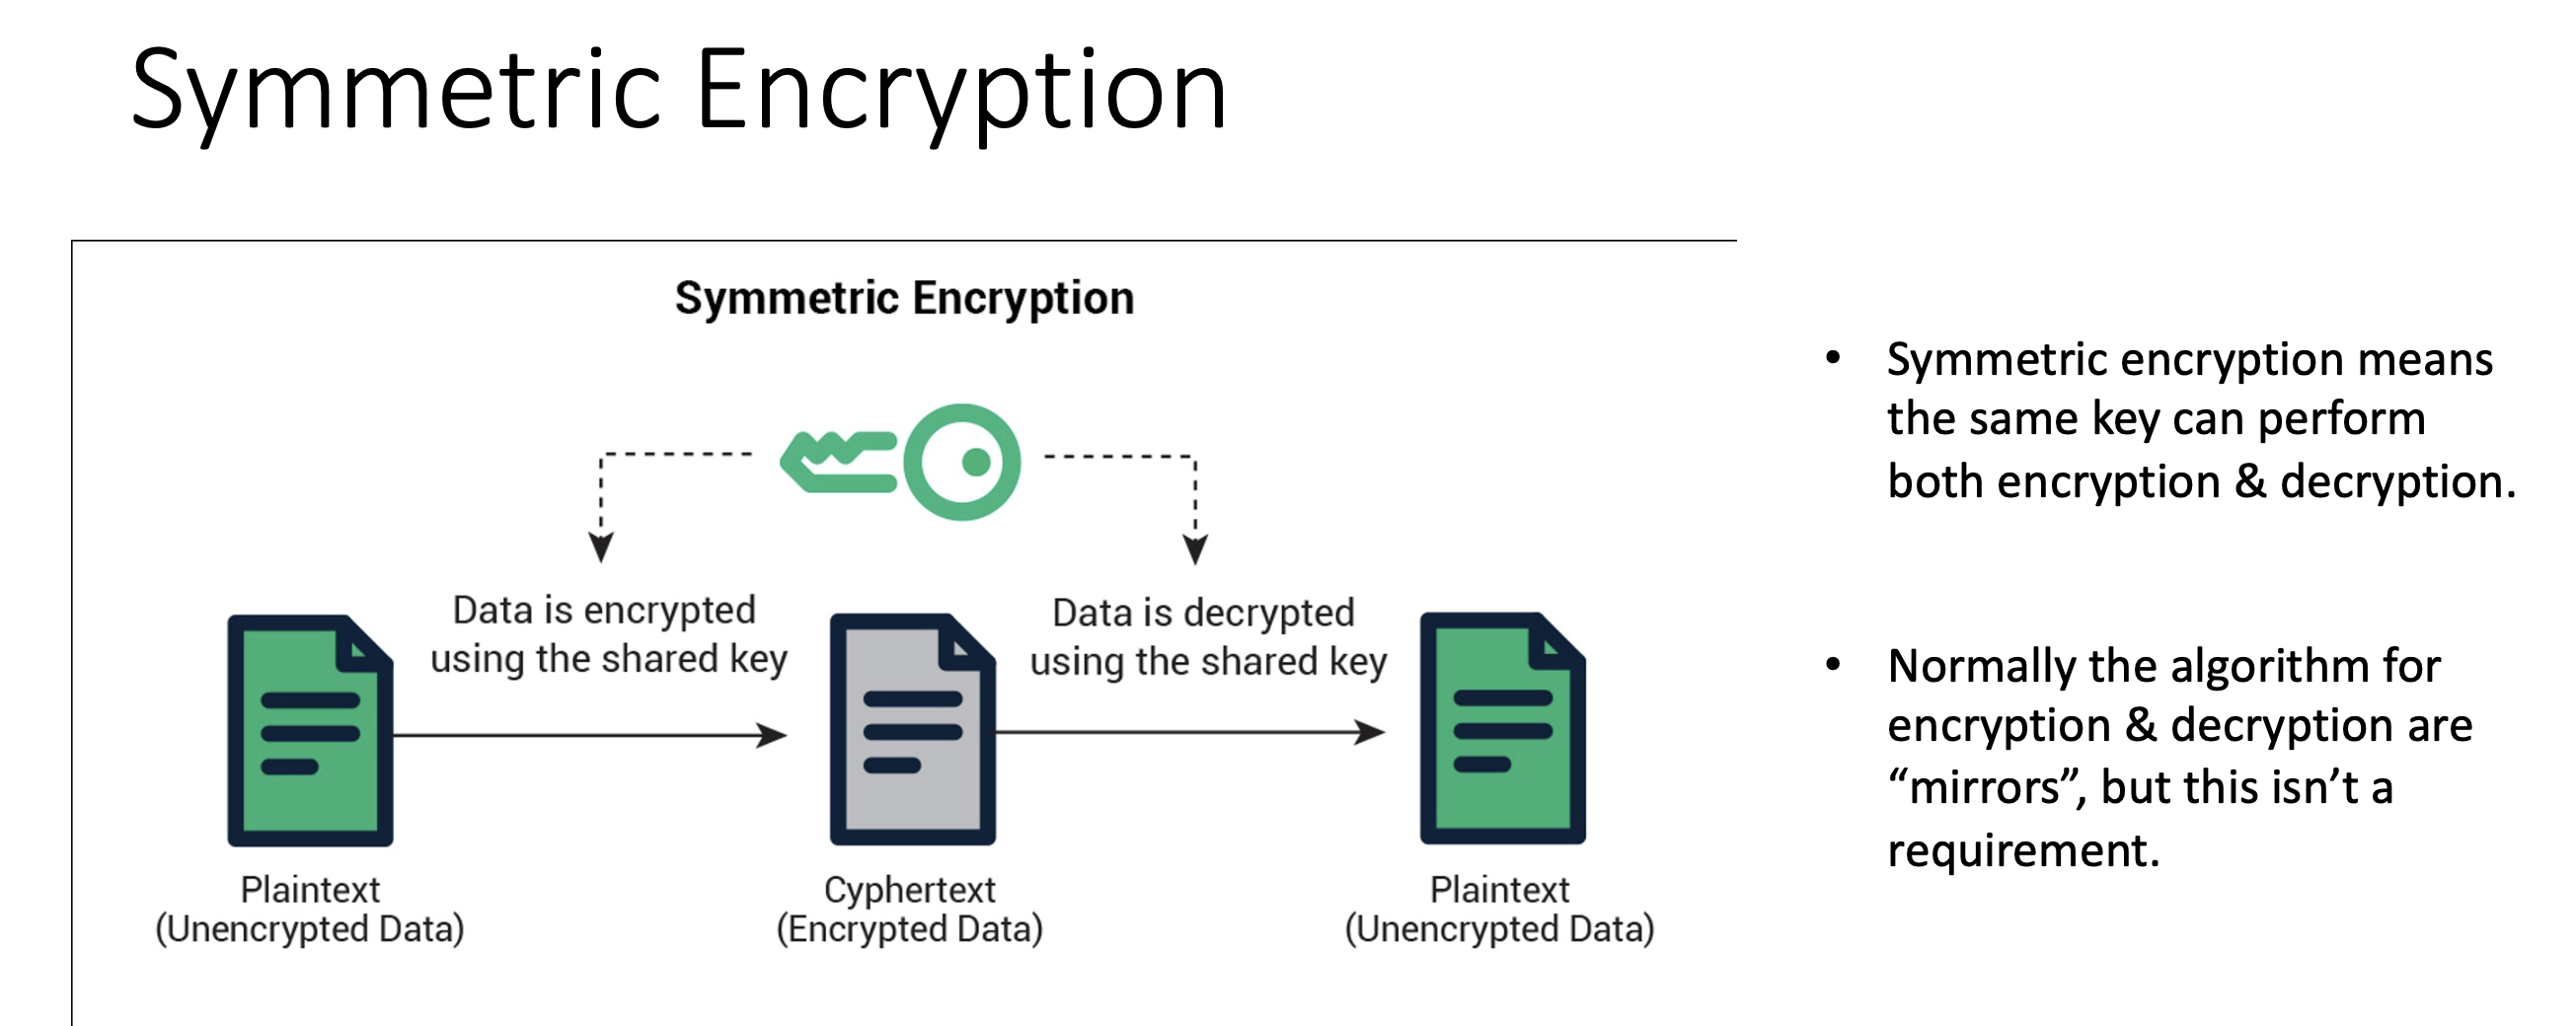

# 2. Public Key Cryptography
----

Also referred to as asymmetric cryptography. 

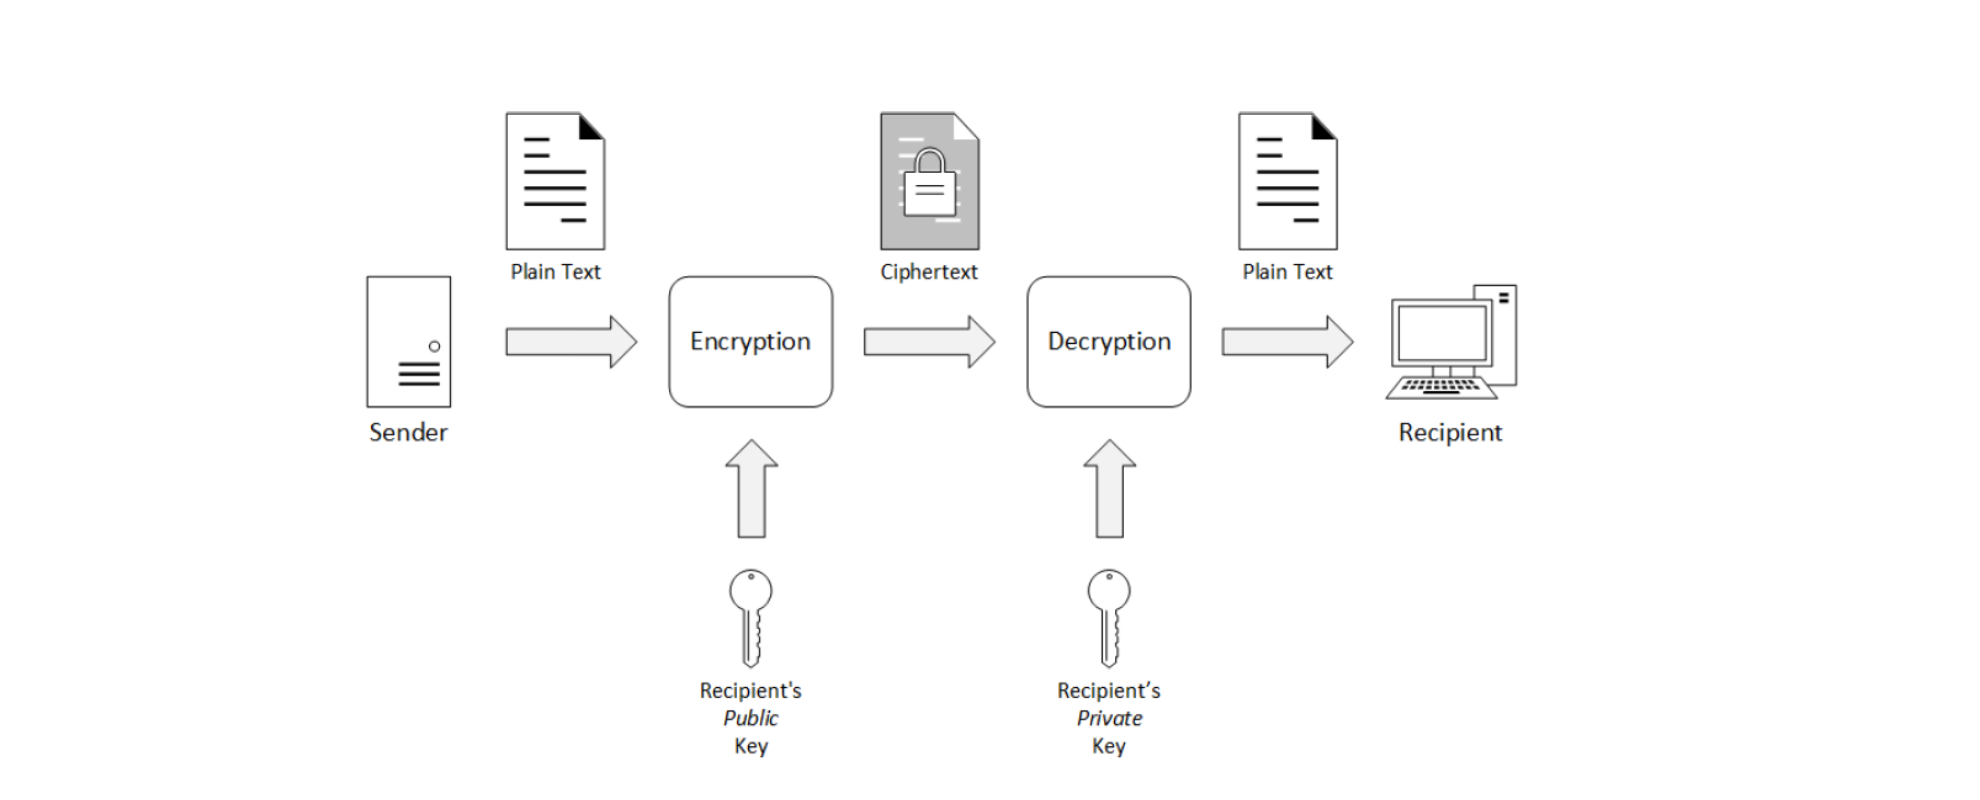

- Public key cryptography tends to be slower than secret key cryptography but more easily configurable.

- Therefore, it is common to use the public key in the beginning of communication for authentication and to establish a temporary shared secret key. Then the secret key technology is used to encrypt the remainder of the conversation

## 2.1. Public Key Algorithms

Public key algorithms differ in their functions and how they perform these functions:

- RSA and ECC: do encryption and digital signatures

- ElGamal and DSS: do digital signatures

- Diffie-Hellman: allows establishment of a shared secret 

- Zero knowledge proof systems: does authentication only

ECC = Elliptic Curve Cryptography, a subdomain of cryptography involving various schemes (for signing, encryption, key agreement, ...).

ECDSA = Elliptic Curve Digital Signature Algorithm, a specific cryptographic scheme consisting of three algorithms: one for key generation, one for creating signatures, one for verifying signatures. It is a variant of the older DSA algorithm, but using elliptic curve based techniques rather than multiplication-modulo-a-prime.



## 2.2. Applications of Public Key Cryptography

- Transmitting Over an Insecure Channel 
- Secure Storage on Insecure Media
- Authentication
- Digital Signatures

这里需要注意, Authentication和Digital Signatures是不同的, 我们服务器的ssh免密登录以及GitHub添加本机公钥都是属于非对称加密在Authentication上的应用. 

## 2.3 Secure Storage on Insecure Media

- Data can be encrypted with the public key, then decrypted with the private key, when needed.
- For performance reasons, the data can be encrypted with a randomly generated secret key.
- The secret key can be encrypted with the public key and shared with others or safe keeping.
- The advantage of public key technology is that Alice can encrypt a message for Bob without knowing his decryption key. 

所以, 比如两个电脑A和B, 那他们想要相互交流, 必须都得知道对方的public key, A使用B的public key加密信息发送给B, B用自己的private key解密, B用A的public key加密要发给A的信息, 然后A用自己private key...

小明使用银行的公钥加密了“我要存5000元”的信息，发送给了银行，如果中间被截取了这个信息吗，由于没有私钥，是没办法进行篡改和解密的，银行收到信息后，将信息进行解密后进行操作，然后将“操作成功/失败”的信息用小明的公钥进行加密后发送给小明，小明收到信息用自己的私钥进行解密操作。


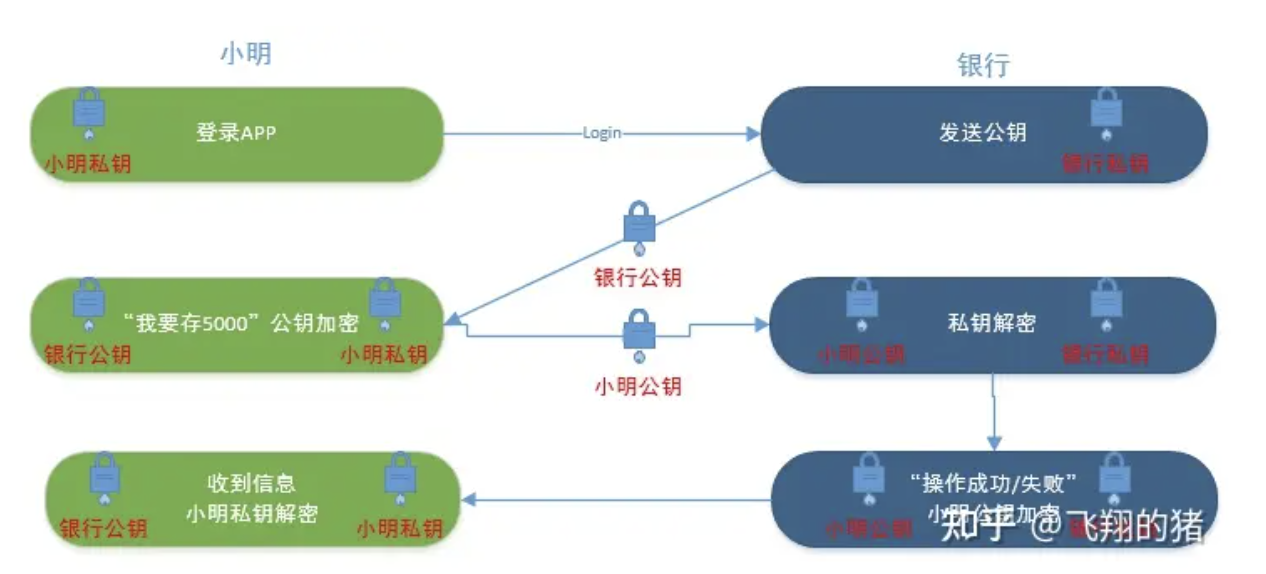

### 2.3.1 Man-in-the-middle attack

SSH 登录过程中采用的非对称的加密方式，这里会有一个问题，如果有人截取了登录请求，冒充主机，将自己伪造的公钥给到用户，用户可能就傻傻分不清楚了。

一般有两种处理方式，也是我们平时常见的，分别是：公钥指纹和上传公钥；

1. **公钥指纹**

"公钥指纹"，是指公钥长度较长很难比对时，对其进行MD5计算，将它变成一个128位的指纹，并且将该指纹公布，由于进行了MD5加密（不可逆），也就不存在推测出公钥指纹的值；这在`Linux/ssh`笔记里有详细介绍. 

下面是第一次使用ssh连接服务器时, ssh的提醒, 可以去服务器使用相关命令查看其指纹, ED25519是一种Digital Signature算法. 注意DS算法只能用于验证身份, 并不能用于加密. 

DSA stands for "Digital Signature Algorithm" - and is specifically designed to produce digital signatures, **not perform encryption**. 

- https://crypto.stackexchange.com/a/2586

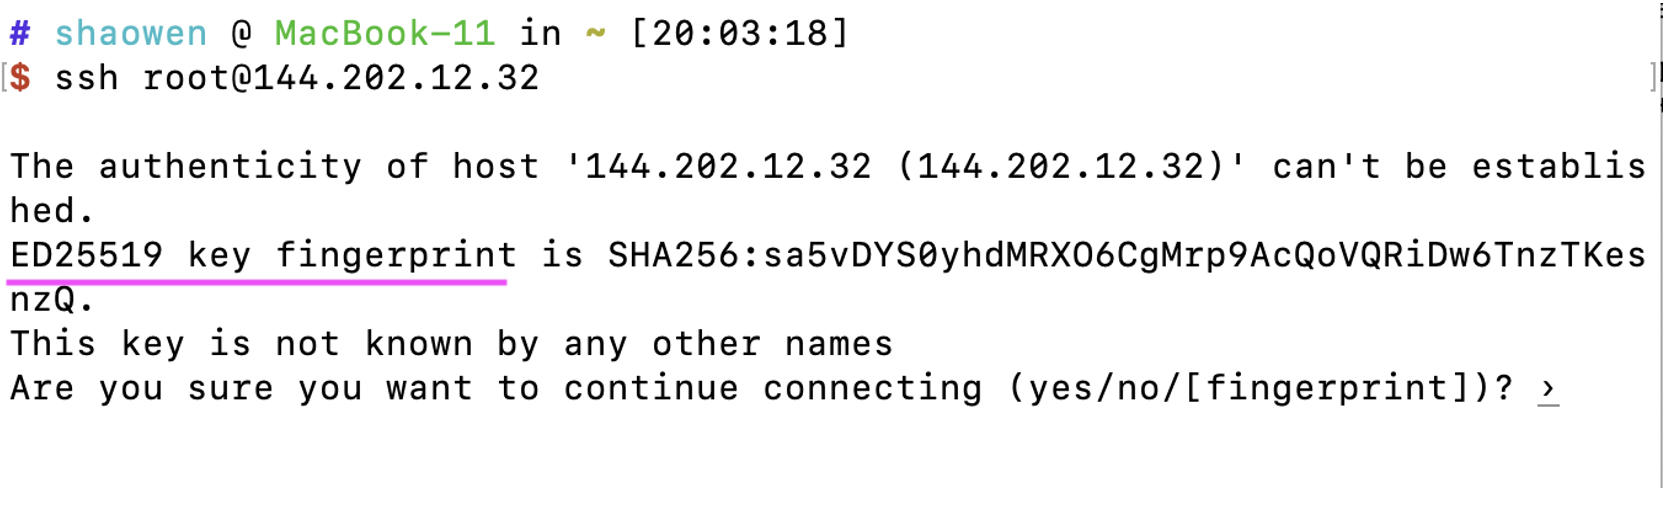

2. **上传公钥**

“上传公钥”的方式其实我们操作过，github上，我们就经常会这么做，把自己的公钥复制到仓库中，这样登录就不再需要输入密码了；用户登录的时候，远程主机会向用户发送一段随机字符串，用户用自己的私钥加密后，再发回来。远程主机用事先储存的公钥进行解密，如果成功，就证明用户是可信的，直接允许登录shell，不再要求密码。

参考:

- [Man-in-the-middle attack](https://en.wikipedia.org/wiki/Man-in-the-middle_attack)

- [异曲同工的SSH和HTTPS - 知乎](https://zhuanlan.zhihu.com/p/353282317)

### 2.2.2. Authentication

- Alice can use public key cryptography to verifying Bob’s identity if Alice knows Bob’s public key.
- Alice chooses a random number `r`, encrypts it using Bob’s public key, and sends the result to Bob.
- Bob proves he knows `dB` by decrypting the message and sending `r` back to Alice.
- The advantage of **public key authentication** is that Alice does not need to keep any secret information to verify Bob.
- So if Alice is a computer system, stealing the computer won’t compromise any secrets.

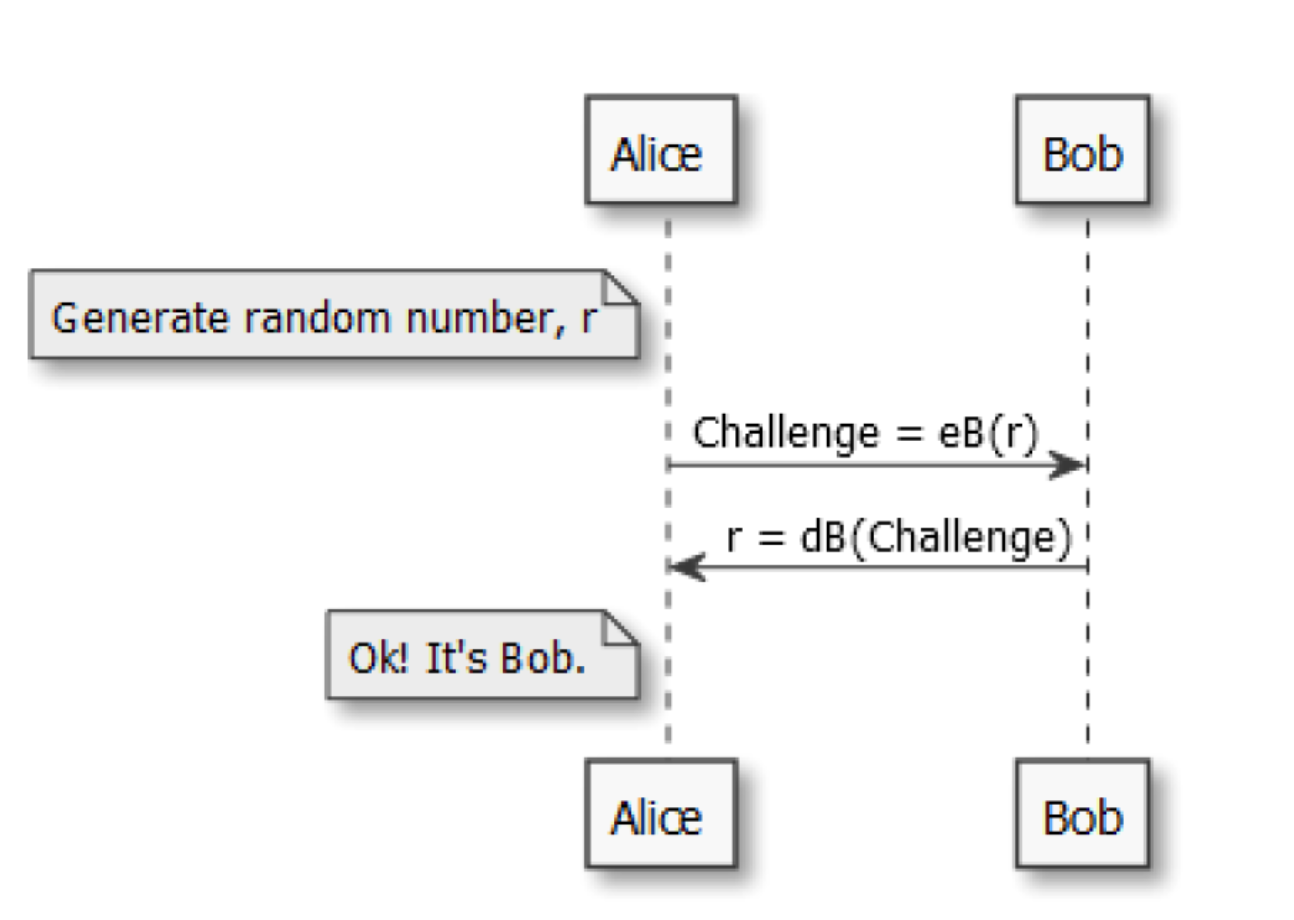

### 2.2.3. Digital Signatures

To prove that a message, `m`, was generated by a Bob, his signature needs to be generated with the Bob’s private key. If `m` is modified in any way, the signature no longer matches.

Digital signatures provide two important functions. They prove who generated the information, and they prove that the information has not been modified in any way by anyone since the message and matching signature were generated.

Non-repudiation is another advantage of public key cryptography. Bob cannot claim he did not send the message since he is the only one that knows the private key.



# 3. Digital Signature
---

Digital signature infrastructures have two distinct goals:

- Enforce non-repudiation by assuring the recipient that the message truly came from the claimed sender.
- Assure the recipient that the message was not altered while in transit
- DS algorithms rely on public key cryptography and hashing functions.
- DS can be used also by software vendors to authenticate code distributions downloaded from the Internet, such as apps and software patches.
- **Note that DS process does not provide any privacy by itself**.

## 3.1. Digital Signature Standard (DSS)

DSS specifies the encryption algorithms that can be used to support a digital signature infrastructure.

- There are three currently approved standard encryption algorithms: 
    - The Digital Signature Algorithm (DSA)
    - The Rivest, Shamir, Adleman (RSA) algorithm
    - The Elliptic Curve DSA (ECDSA)


## 3.2 Digital Signatures Example

If Alice wants to digitally sign a message to Bob, she performs the following actions:

- Alice generates a message digest of the original plain-text message using one of the cryptographically sound hashing algorithms, such as SHA-1. 
- Alice then encrypts only the message digest using her private key.
- This encrypted message digest is the digital signature (DS).
- Alice appends the signed message digest to the plain-text message.
- Alice transmits the appended message to Bob.

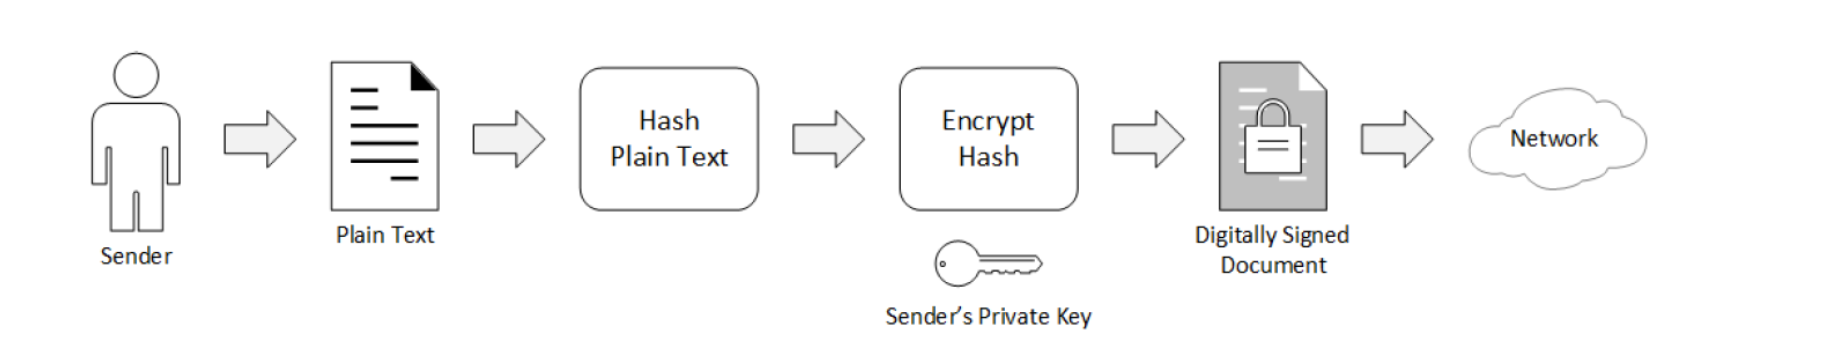

When Bob receives the digitally signed message, he reverses the procedure, as follows:
- Bob decrypts the digital signature using Alice’s public key.
- Bob uses the same hashing function to create a message digest of the full plain-text message received from Alice.
- Bob then compares the decrypted message digest he received from Alice with the message digest he computed himself.
- If the two digests match, he can be assured that the message he received was sent by Alice.
- If they do not match, either the message was not sent by Alice or the message was modified while in transit.



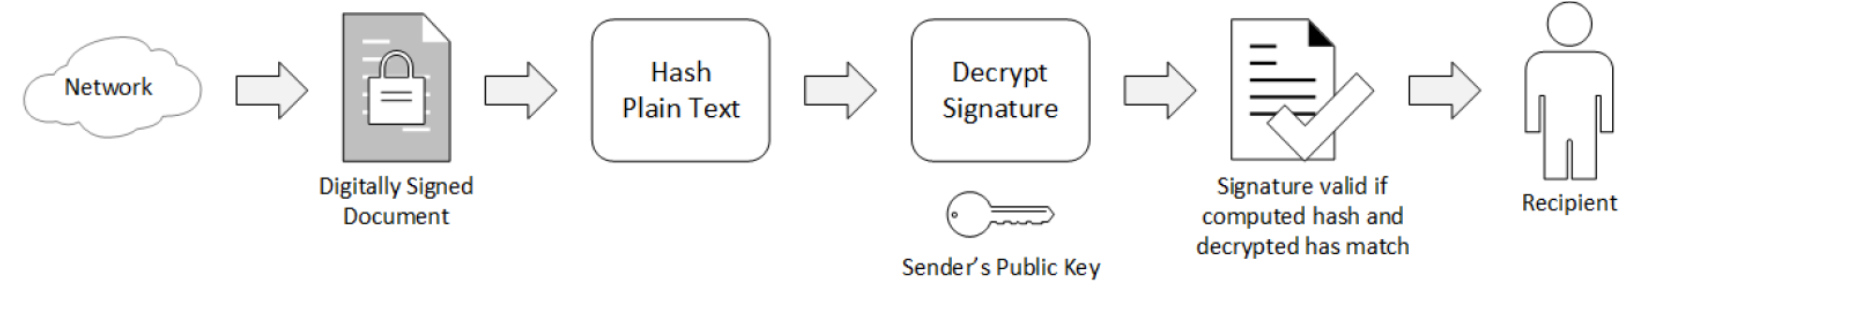